In [1]:
import tensorflow as tf
import os

# menggunakan modul split folders

In [2]:
import splitfolders
base_dir = 'Rice_Image_Dataset'

In [3]:
os.listdir(base_dir)

['Arborio',
 'Basmati',
 'Ipsala',
 'Jasmine',
 'Karacadag',
 'Rice_Citation_Request.txt']

# membagi folder menggunakan split folder

In [4]:
splitfolders.ratio(base_dir, output='riceImageDataset',seed=42, ratio=(0.6,0.4))

# Menggunakan modul os untuk menggabungkan path direktori train dan validation dengan dataset 'riceImageDataset'

In [5]:
train_dir = os.path.join('riceImageDataset', 'train')
validation_dir = os.path.join('riceImageDataset', 'val')

In [6]:
Arborio_dir = os.path.join(base_dir,'Arborio')
Basmati_dir = os.path.join(base_dir,'Basmati')
Ipsala_dir = os.path.join(base_dir,'Ipsala')
Jasmine_dir = os.path.join(base_dir,'Jasmine')
Karacadag_dir = os.path.join(base_dir,'Karacadag')

In [7]:
from sklearn.model_selection import train_test_split
train_Arborio_dir,val_Arborio_dir = train_test_split(os.listdir(Arborio_dir),test_size = 0.4)
train_Basmati,val_Basmati = train_test_split(os.listdir(Basmati_dir),test_size = 0.4)
train_Ipsala_dir,val_Ipsala_dir = train_test_split(os.listdir(Ipsala_dir),test_size = 0.4)
train_Jasmine_dir,val_Jasmine_dir = train_test_split(os.listdir(Jasmine_dir),test_size = 0.4)
train_Karacadag_dir,val_Karacadag_dir = train_test_split(os.listdir(Karacadag_dir),test_size = 0.4)

# Mengimport modul ImageDataGenerator dari paket tensorflow.keras.preprocessing.image

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode ='nearest'
)
validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

# Menggunakan metode flow_from_directory untuk memuat dan mengolah data latih dari direktori train_dir
# Menggunakan metode flow_from_directory untuk memuat dan mengolah data validasi dari direktori validation_dir

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 45000 images belonging to 5 classes.
Found 30000 images belonging to 5 classes.


# Membuat model sequential untuk membangun arsitektur jaringan saraf konvolusi

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
import tensorflow as tf

class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.96:
            print("\nAkurasi mencapai 96%, menghentikan pelatihan.")
            self.model.stop_training = True
callback = AccuracyCallback()

Epoch 1/35
35/35 [==============================] - 17s 451ms/step - loss: 2.0350 - accuracy: 0.1857 - val_loss: 1.6120 - val_accuracy: 0.0500
Epoch 2/35
35/35 [==============================] - 15s 438ms/step - loss: 1.6084 - accuracy: 0.1929 - val_loss: 1.5374 - val_accuracy: 0.4000
Epoch 3/35
35/35 [==============================] - 15s 439ms/step - loss: 1.3932 - accuracy: 0.3500 - val_loss: 1.1246 - val_accuracy: 0.5000
Epoch 4/35
35/35 [==============================] - 15s 440ms/step - loss: 0.9706 - accuracy: 0.5857 - val_loss: 0.4673 - val_accuracy: 0.9000
Epoch 5/35
35/35 [==============================] - 15s 440ms/step - loss: 0.7112 - accuracy: 0.6929 - val_loss: 0.5932 - val_accuracy: 0.8000
Epoch 6/35
35/35 [==============================] - 15s 440ms/step - loss: 0.5693 - accuracy: 0.7857 - val_loss: 0.6619 - val_accuracy: 0.8000
Epoch 7/35
35/35 [==============================] - 15s 441ms/step - loss: 0.6196 - accuracy: 0.7429 - val_loss: 0.5592 - val_accuracy: 0.8500

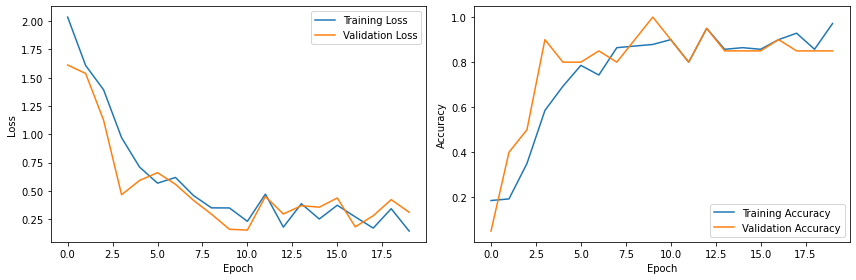

In [14]:
import matplotlib.pyplot as plt
history = model.fit(
      train_generator,
      steps_per_epoch=35,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=35,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      callbacks = [callback]
      )

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 33ms/step
Predicted class probabilities: [[1. 0. 0. 1. 0.]]
Arborio


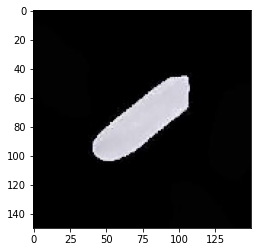

In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

# Open a file dialog to select an image file
root = tk.Tk()
root.withdraw()  # Hide the main window
file_path = filedialog.askopenfilename()

# Load and predict the selected image
if file_path:
    img = image.load_img(file_path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)
    print("Predicted class probabilities:", classes)

    if classes[0][0] == 1:
        print("Arborio")
    elif classes[0][1] == 1:
        print("Basmati")
    elif classes[0][2] == 1:
        print("Ipsala")
    elif classes[0][3] == 1:
        print("Jasmine")
    elif classes[0][4] == 1:
        print("Karacadag")
    
    else:
        print("Class not identified")
else:
    print("No file selected.")
